In [129]:
#necessary libraries
import pandas as pd
import os
import numpy as np
import tensorflow as tf

In [130]:
#import dataset
moviesDataset=pd.read_csv(os.path.join(os.path.dirname('__file__'), "movie_metadata.csv"))
moviesDataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [131]:
#drop rows where gross elements are null due to the fact that our target column will be derived from these two columns 
test = moviesDataset[moviesDataset.gross.notnull()]

In [132]:
test = test[test.budget.notnull()]

In [133]:
#split the monvie categories and convert them as dummies 
cleaned = test.set_index('movie_title').genres.str.split('|', expand=True).stack()
cleaned

movie_title                                 
Avatar                                     0         Action
                                           1      Adventure
                                           2        Fantasy
                                           3         Sci-Fi
Pirates of the Caribbean: At World's End   0         Action
                                           1      Adventure
                                           2        Fantasy
Spectre                                    0         Action
                                           1      Adventure
                                           2       Thriller
The Dark Knight Rises                      0         Action
                                           1       Thriller
John Carter                                0         Action
                                           1      Adventure
                                           2         Sci-Fi
Spider-Man 3                               0         Ac

In [134]:
splitGenres = pd.get_dummies(cleaned, prefix='g').groupby(level=0).sum()
splitGenres['index1'] = splitGenres.index

In [135]:
#merge the initial dataset with the above-created columns
test2=pd.merge(test, splitGenres, left_on = 'movie_title', right_on = 'index1')

In [136]:
#drop the columns index1 and genre
test2=test2.drop(['index1', 'genres'], axis = 1)

In [137]:
#fill NAs of continuous variables with zeroes and the categorical ones with dots
test3 = test2.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))

In [138]:
#create our dependent column (Y)
test3['blockbuster'] = 0

In [139]:
#find the gross margin so as to classify our entries as blockbuster or not
test3['grossMargin'] = test3['gross']/(test3['budget'] + test3['gross'])

In [140]:
#if gross margin is larger than the threshold=0.7 is considered as blockbuster
test3.loc[test3['grossMargin'] < 0.7, 'blockbuster'] = 0
test3.loc[test3['grossMargin'] >= 0.7, 'blockbuster'] = 1

In [141]:
#drop movie_imdb_link and grossMargin columns
test3 = test3.drop(['movie_imdb_link', 'grossMargin'], axis = 1)

In [142]:
test3

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,g_Musical,g_Mystery,g_Romance,g_Sci-Fi,g_Short,g_Sport,g_Thriller,g_War,g_Western,blockbuster
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,0,0,0,1,0,0,0,0,0,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,...,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,...,0,0,0,0,0,0,1,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,...,0,0,0,0,0,0,1,0,0,0
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,...,0,0,0,1,0,0,0,0,0,0
5,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,...,0,0,2,0,0,0,0,0,0,0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,...,0,0,2,0,0,0,0,0,0,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,...,1,0,1,0,0,0,0,0,0,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,...,0,0,0,1,0,0,0,0,0,0
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Alan Rickman,...,0,1,0,0,0,0,0,0,0,0


In [143]:
#SET random seed to get the same random results every time for tf AND np
npRandom = np.random.seed(seed=12345)
tfRandom = tf.set_random_seed(1)

In [144]:
#split train and test sets
npRandom
msk= np.random.rand(len(test3)) < 0.8

In [145]:
train_dataset = test3[msk]
train_dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,g_Musical,g_Mystery,g_Romance,g_Sci-Fi,g_Short,g_Sport,g_Thriller,g_War,g_Western,blockbuster
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,...,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,...,0,0,0,0,0,0,1,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,...,0,0,0,0,0,0,1,0,0,0
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,...,0,0,0,1,0,0,0,0,0,0
5,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,...,0,0,2,0,0,0,0,0,0,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,...,1,0,1,0,0,0,0,0,0,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,...,0,0,0,1,0,0,0,0,0,0
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Alan Rickman,...,0,1,0,0,0,0,0,0,0,0
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Henry Cavill,...,0,0,0,1,0,0,0,0,0,0
12,Color,Marc Forster,403.0,106.0,395.0,393.0,Mathieu Amalric,451.0,168368427.0,Giancarlo Giannini,...,0,0,0,0,0,0,0,0,0,0


In [146]:
test_dataset = test3[~msk]
test_dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,g_Musical,g_Mystery,g_Romance,g_Sci-Fi,g_Short,g_Sport,g_Thriller,g_War,g_Western,blockbuster
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,0,0,0,1,0,0,0,0,0,1
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,...,0,0,2,0,0,0,0,0,0,0
11,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Kevin Spacey,...,0,0,0,1,0,0,0,0,0,0
16,Color,Andrew Adamson,258.0,150.0,80.0,201.0,Pierfrancesco Favino,22000.0,141614023.0,Peter Dinklage,...,0,0,0,0,0,0,0,0,0,0
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Chris Hemsworth,...,0,0,0,2,0,0,0,0,0,1
18,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Chris Hemsworth,...,0,0,0,2,0,0,0,0,0,1
26,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Naomi Watts,...,0,0,3,0,0,0,0,0,0,0
31,Color,Peter Berg,377.0,131.0,532.0,627.0,Alexander Skarsgård,14000.0,65173160.0,Liam Neeson,...,0,0,0,1,0,0,1,0,0,0
32,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Bryce Dallas Howard,...,0,0,0,1,0,0,1,0,0,1
38,Color,Tim Burton,451.0,108.0,13000.0,11000.0,Alan Rickman,40000.0,334185206.0,Johnny Depp,...,0,0,0,0,0,0,0,0,0,0


In [147]:
#split the x and y for the train set
x_train = train_dataset.drop('blockbuster', axis=1)
y_train = train_dataset.blockbuster

In [148]:
#use categorical processor in order to convert the catergorical variables in an integer
#form that could be manipulated by tensorflow
from tensorflow.contrib import learn as skflow
cat_processor = skflow.preprocessing.CategoricalProcessor()
x_train = np.array(list(cat_processor.fit_transform(x_train)))
x_train

array([[   1,    1,    1, ...,    1,    1,    1],
       [   1,    2,    2, ...,    2,    1,    1],
       [   1,    3,    3, ...,    2,    1,    1],
       ..., 
       [   1,  360,  344, ...,    2,    1,    1],
       [   1, 1284,  481, ...,    1,    1,    1],
       [   1, 1338,  376, ...,    1,    1,    1]], dtype=int64)

In [149]:
#convert to numpy array
y_train=y_train.values
y_train

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [150]:
#split to x and y for test set
x_test = test_dataset.drop('blockbuster', axis=1)
y_test = test_dataset.blockbuster

In [151]:
#convert the categorical to integers
x_test = np.array(list(cat_processor.transform(x_test)))

In [152]:
#convert to numpy array
y_test=y_test.values
y_test

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0,

In [153]:
from __future__ import print_function
from tensorflow.python.framework import ops


In [154]:
ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [155]:
# Parameters
learning_rate = 0.01
training_epochs = 10
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_hidden_3 = 256 # 3nd layer number of features
n_input = 49
n_classes = 1 
STDDEV = 0.1

In [156]:
print("Number of predictors \t%s" %(n_input))
print("Number of classes \t%s" %(n_classes))


Number of predictors 	49
Number of classes 	1


In [157]:
# tf Graph input
x_data = tf.placeholder(shape=[None, 49], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [158]:
#declare weights and biases
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=STDDEV, seed = 3)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=STDDEV, seed = 3)),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3],stddev=STDDEV, seed = 3)),
    'out': tf.Variable(tf.random_normal([n_hidden_3, n_classes],stddev=STDDEV, seed = 3)),                                   
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1], seed = 7)),
    'b2': tf.Variable(tf.random_normal([n_hidden_2], seed = 7)),
    'b3': tf.Variable(tf.random_normal([n_hidden_3], seed = 7)),
    'out': tf.Variable(tf.random_normal([n_classes], seed = 7))
}

In [159]:
#declare multilayer perceptron
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with TANH activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.tanh(layer_1)
    # Hidden layer with TANH activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.tanh(layer_2)
    # Hidden layer with SOFTMAX activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h2']), biases['b2'])
    layer_3 = tf.nn.tanh(layer_3)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer

# Construct model
prediction = multilayer_perceptron(x_data, weights, biases)
# Test model
#predictions_correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_target, 1))
# Calculate accuracy
#accuracy = tf.nn.l2_loss(prediction-y_test,name="squared_error_test_cost")/x_test.shape[0]

predicted_class = tf.greater(prediction,0.7)
correct = tf.equal(predicted_class, tf.equal(y_target,1.0))
accuracy = tf.reduce_mean( tf.cast(correct, 'float') )

In [160]:
# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=prediction, labels=y_target))
my_opt = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_step = my_opt.minimize(loss)

In [161]:
# Initializing the variables
init = tf.global_variables_initializer()
sess.run(init)

In [162]:
#Run graph
loss_vec = []
epochs = []
train_acc = []
test_acc = []
for epoch in range(training_epochs):
    avg_cost = 0.
    np.random.seed(seed=666)
    rand_index = np.random.choice(len(x_train), size=batch_size)
    rand_x = x_train[rand_index]
    rand_y = np.transpose([y_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_train, y_target: np.transpose([y_train])})
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_test, y_target: np.transpose([y_test])})
    test_acc.append(temp_acc_test)
    if (epoch+1)%display_step==0:
        print('Epoch:' +str('%04d' % (epoch+1))+ 
              ' Loss = ' + str(temp_loss),'train acc = '+ str(temp_acc_train),'test_acc='+ str(temp_acc_test))

Epoch:0001 Loss = 2.46927 train acc = 0.769181 test_acc=0.737113
Epoch:0002 Loss = 1.59419 train acc = 0.769181 test_acc=0.737113
Epoch:0003 Loss = 0.857304 train acc = 0.769181 test_acc=0.737113
Epoch:0004 Loss = 0.661618 train acc = 0.769181 test_acc=0.737113
Epoch:0005 Loss = 0.579011 train acc = 0.769181 test_acc=0.737113
Epoch:0006 Loss = 0.53141 train acc = 0.769181 test_acc=0.737113
Epoch:0007 Loss = 0.556046 train acc = 0.769181 test_acc=0.737113
Epoch:0008 Loss = 0.544916 train acc = 0.769181 test_acc=0.737113
Epoch:0009 Loss = 0.526188 train acc = 0.769181 test_acc=0.737113
Epoch:0010 Loss = 0.530691 train acc = 0.769181 test_acc=0.737113


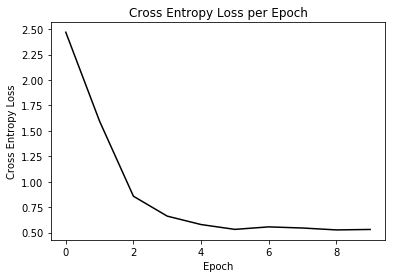

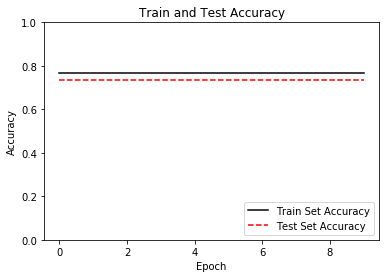

In [163]:
import matplotlib.pyplot as plt
import pylab


# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.show()

# Plot train and test accuracy
pylab.ylim([0,1])
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [164]:
sess.run([x_data, weights], feed_dict={x_data: rand_x, y_target: rand_y});

In [165]:
weights

{'h1': <tf.Variable 'Variable:0' shape=(49, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'h3': <tf.Variable 'Variable_2:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_3:0' shape=(256, 1) dtype=float32_ref>}

In [166]:
#Find Final weights 
sess.run(weights['out']);

In [167]:
# Keep only final weights 
weightsThatMatter = sess.run(weights['out'])

In [168]:
# Weights that have the biggest values
weightsThatMatter[weightsThatMatter >= 0.2]

array([ 0.23378007,  0.21248525,  0.23728834,  0.21681246,  0.20738317], dtype=float32)

In [169]:
# Weights with the smallest values
weightsThatMatter[weightsThatMatter < -0.2]

array([-0.27393019], dtype=float32)

In [170]:
type(weightsThatMatter)
W = np.array(weightsThatMatter).mean(axis=1)
type(W)

numpy.ndarray

In [171]:
Wlist = np.ndarray.tolist(W)

In [172]:
Wlist;

In [173]:
wID = list(range(1, len(Wlist)+1))

In [174]:
wID;

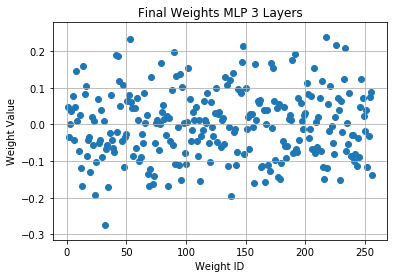

In [175]:
# Plot of all the Weights 
plt.scatter(wID, Wlist)
plt.title('Final Weights MLP 3 Layers')
plt.xlabel('Weight ID')
plt.ylabel('Weight Value')
plt.grid()
plt.show()

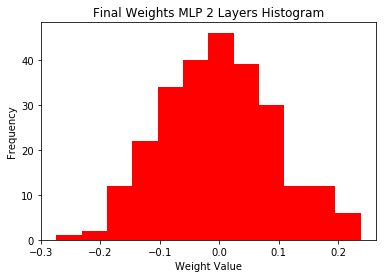

In [176]:
# Plot of all the Weights  Frequency
plt.hist(Wlist,  bins=12, facecolor='red',) #alpha = 0.1,
plt.title('Final Weights MLP 2 Layers Histogram')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
#plt.grid()
plt.show()